https://www.kaggle.com/datasets/preetviradiya/imdb-movies-ratings-details

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score #benzerlik skoru
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("IMDB_movie_reviews_details.csv")

In [4]:
df.head()

,Unnamed: 0,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"2,394,059",$28.34M
1,1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,An organized crime dynasty's aging patriarch t...,"1,658,439",$134.97M
2,2,Soorarai Pottru,2020,153,Drama,9.1,NaN,"Nedumaaran Rajangam ""Maara"" sets out to make t...","78,266",NaN
3,3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,"2,355,907",$534.86M
4,4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,"1,152,912",$57.30M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   name        1000 non-null   object 
 2   year        1000 non-null   object 
 3   runtime     1000 non-null   int64  
 4   genre       1000 non-null   object 
 5   rating      1000 non-null   float64
 6   metascore   841 non-null    float64
 7   timeline    1000 non-null   object 
 8   votes       1000 non-null   object 
 9   gross       829 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [9]:
df["rating"].describe()

count    1000.000000
mean        7.954000
std         0.276008
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: rating, dtype: float64

## ratinge göre kümeleme

In [6]:
rating = df[["name","rating"]]

In [7]:
data_cus1_dummy = pd.get_dummies(rating , drop_first = True)

number of cluster 2, silhouette 0.04216170913808413
number of cluster 3, silhouette 0.0241566686297741
number of cluster 4, silhouette 0.01652102992690356
number of cluster 5, silhouette 0.011048548444989837
number of cluster 6, silhouette 0.006252790213694426
number of cluster 7, silhouette 0.005551317336588231
number of cluster 8, silhouette 0.0036825119087474014
number of cluster 9, silhouette 0.0030430455923912705
number of cluster 10, silhouette 0.0025823603968743118


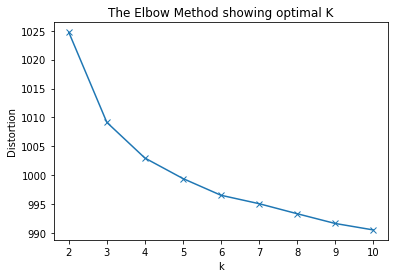

In [8]:
def cluster(x,clusters):
    allscore=[]
    allclusters=[]
    sum_of_squared_distances = []
    x=x
    for i in np.arange(1,clusters):

          i+=1
          model=KMeans(n_clusters=i)
          pred=model.fit_predict(x)
          s_score = silhouette_score(x,pred)
          score=silhouette_score(x,pred)
          print("number of cluster {}, silhouette {}".format(i,score))
          allscore.append(s_score)
          allclusters.append(i)
          sum_of_squared_distances.append(model.inertia_)

    plt.plot(allclusters,sum_of_squared_distances, marker='x')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing optimal K')
    plt.show()
cluster(data_cus1_dummy,10)

In [10]:
model = KMeans(n_clusters = 3)

model = model.fit(data_cus1_dummy)

pred = model.predict(data_cus1_dummy)

In [14]:
rating["clust"] = pred
rating

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,rating,clust
0,The Shawshank Redemption,9.3,2
1,The Godfather,9.2,2
2,Soorarai Pottru,9.1,2
3,The Dark Knight,9.0,2
4,The Godfather: Part II,9.0,2
...,...,...,...
995,Breakfast at Tiffany's,7.6,1
996,Giant,7.6,1
997,Shane,7.6,1
998,From Here to Eternity,7.6,1


In [16]:
rating["clust"] = rating["clust"].replace({"best film":3 , "good film":2 , "normal film":1})

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
sample = rating.sample(50)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


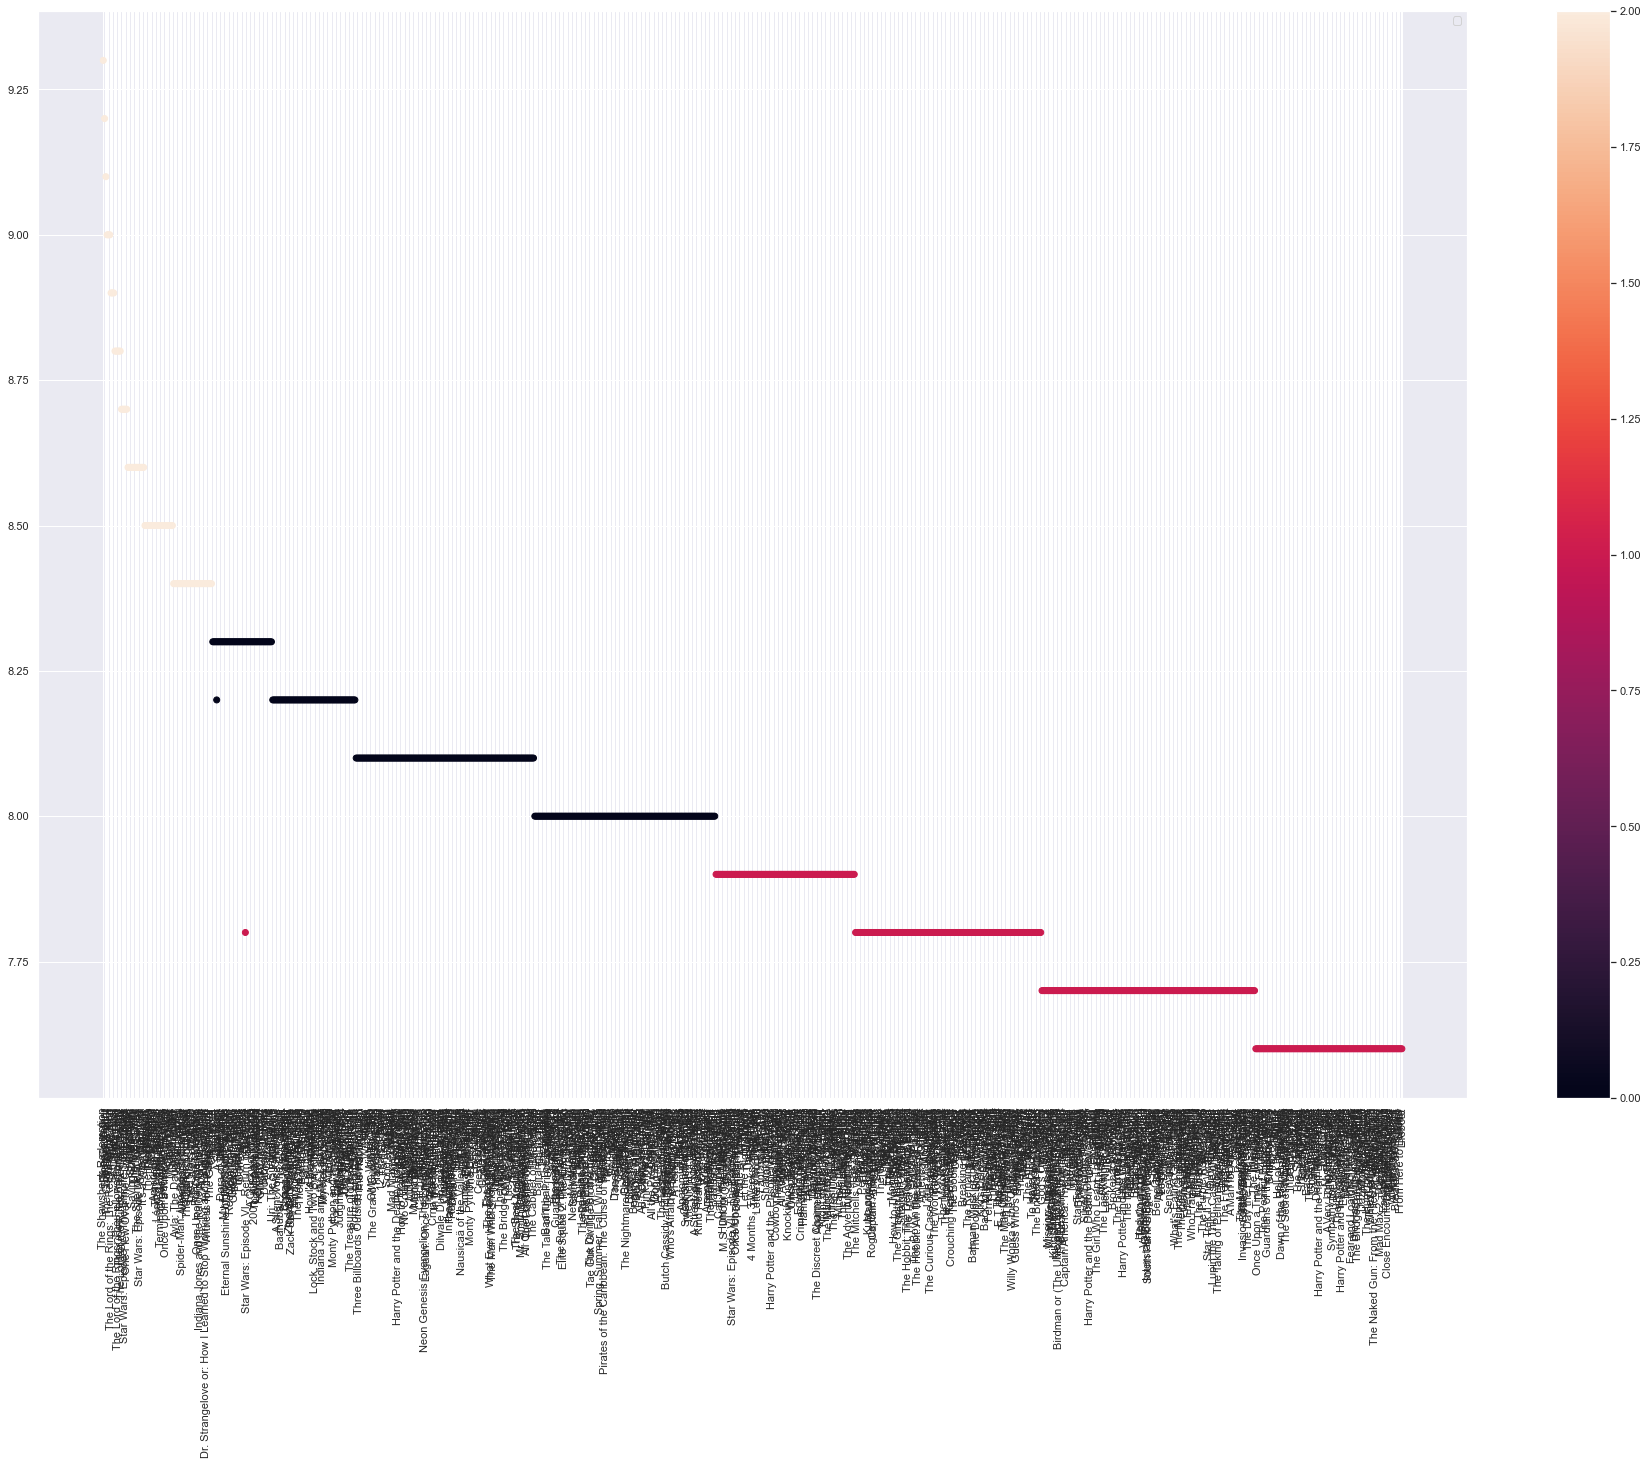

In [27]:
plt.figure(figsize = (32,20))  
plt.scatter(rating["name"],rating["rating"]  ,c =pred)
plt.legend()
plt.xticks(rotation = 90)
plt.colorbar()
plt.show() 

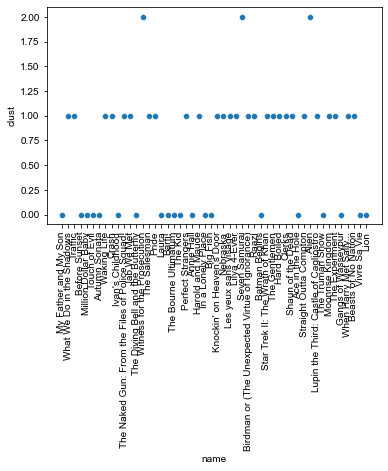

In [26]:
import seaborn as sns 

sns.scatterplot(x  =sample["name"], y = sample["clust"])
sns.set(rc={'figure.figsize':(32,20)})
plt.xticks(rotation = 90)

plt.show() 